In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))


Train data: 

Number of columns: 12
number of rows: 29451


In [6]:
print ('\nTest data: \n')
print ("number of columns: " + str(test.shape[1]))
print ("Number of columns: " + str (test.shape[0]))


Test data: 

number of columns: 11
Number of columns: 68720


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [20]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [9]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [10]:
train ['TARGET(PRICE_IN_LACS)']. describe()

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


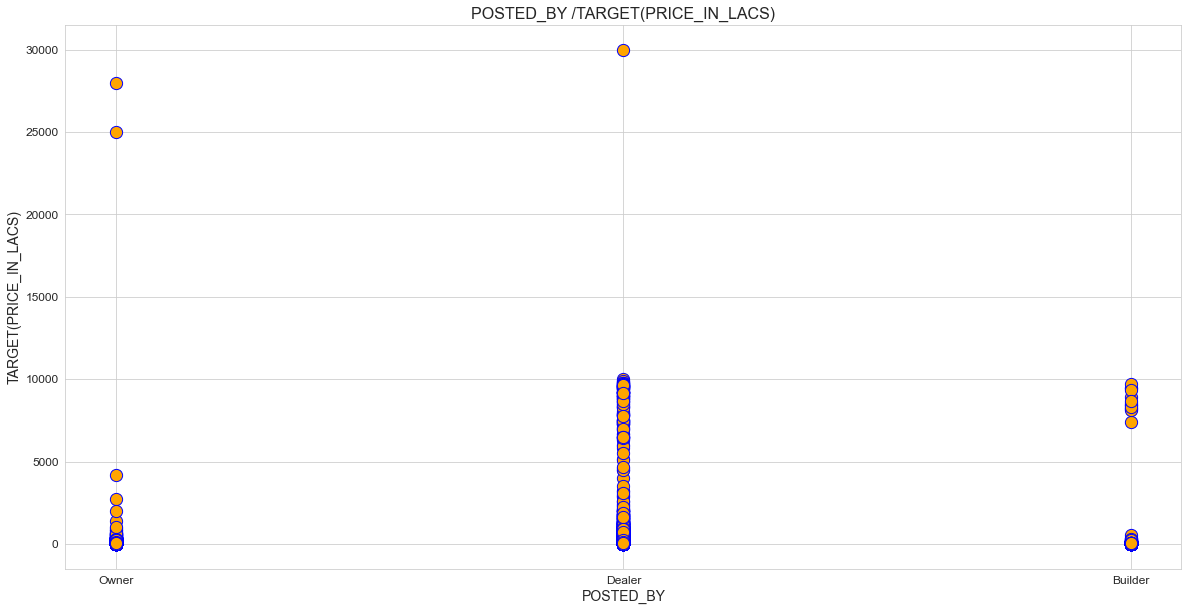

In [11]:

def scatter_train(y_var):
    scatter_train = train.drop(y_var, axis = 1)
    i = train.columns
    
    plot1 = sns.scatterplot(i[0], y_var, data = train, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /TARGET(PRICE_IN_LACS)'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('TARGET(PRICE_IN_LACS)', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
scatter_train('TARGET(PRICE_IN_LACS)')

<AxesSubplot:>

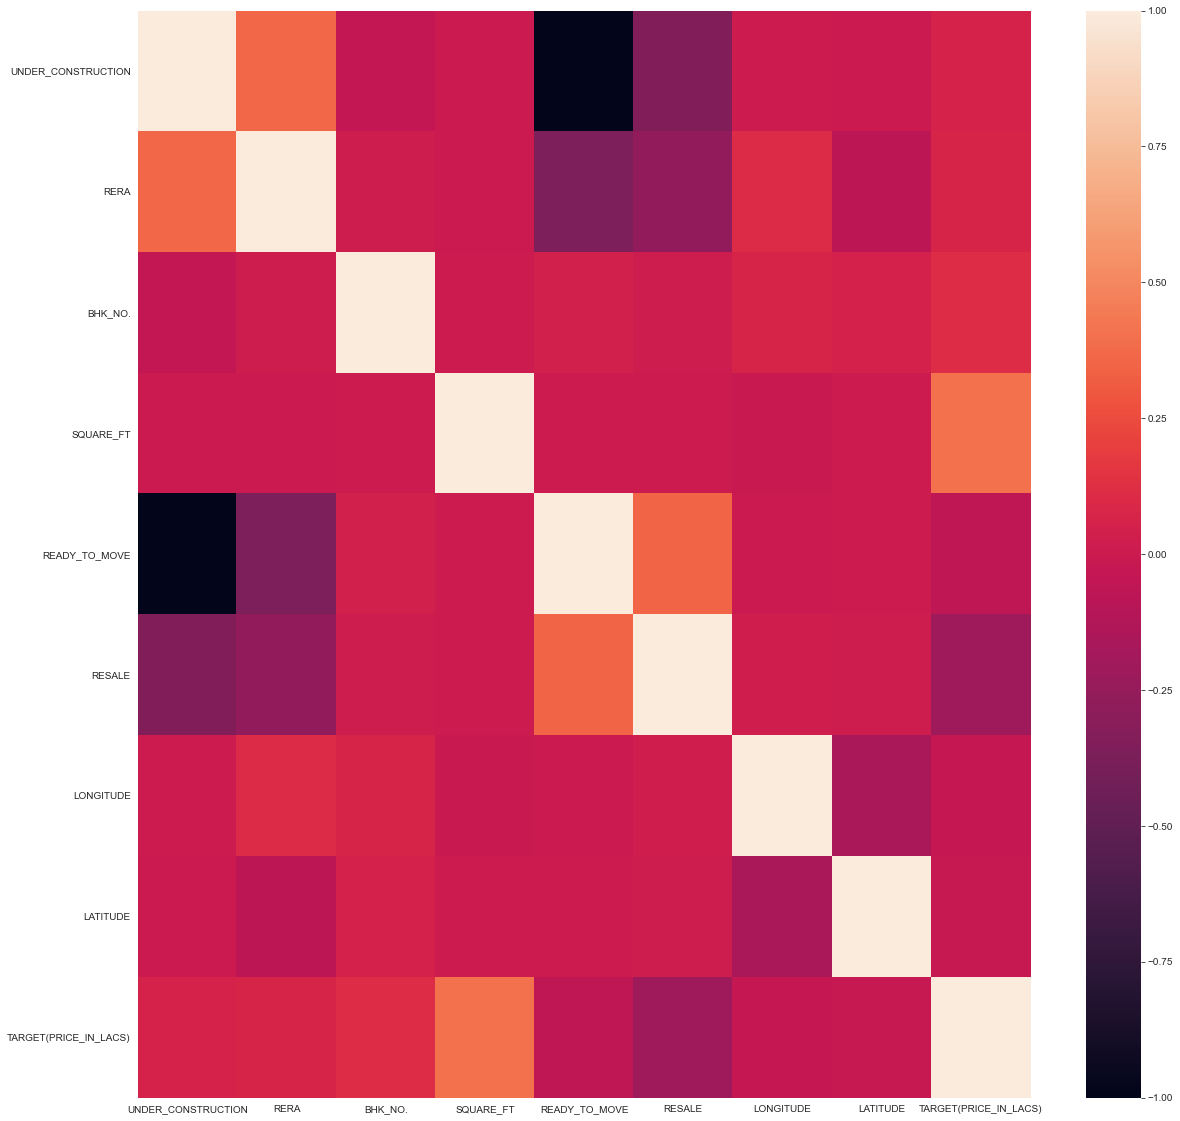

In [12]:
# Heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(train.corr())

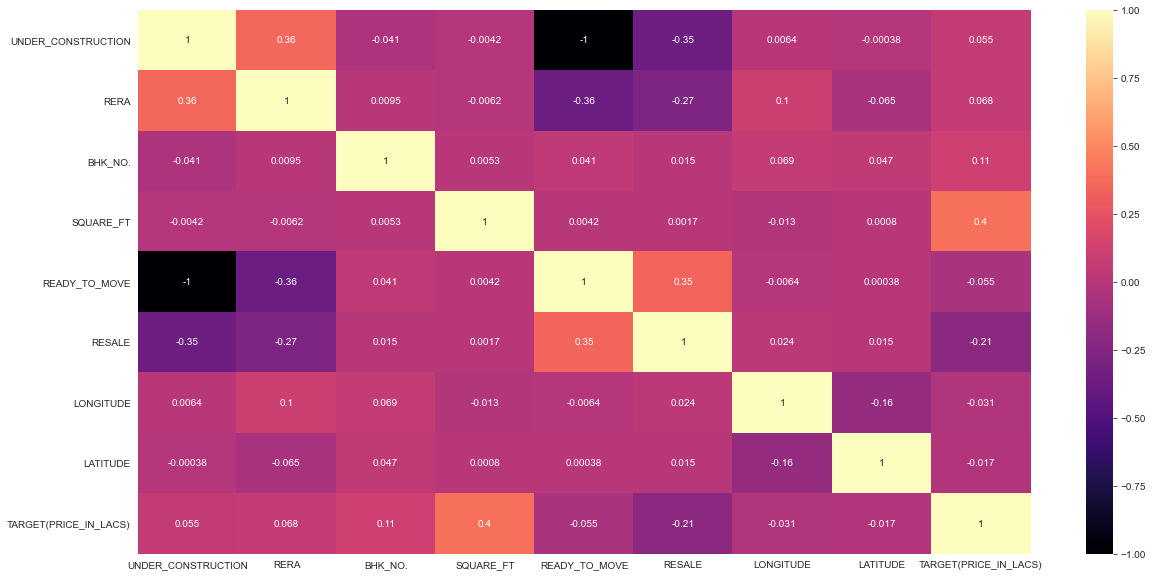

In [13]:
sns.heatmap(train.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [14]:
# FEATURE SELECTION & DATA SPLIT

X_var = train[['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE']].values
y_var = train['TARGET(PRICE_IN_LACS)'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print('X_train samples : ', X_train[0:5])
print('X_test samples : ', X_test[0:5])
print('y_train samples : ', y_train[0:5])
print('y_test samples : ', y_test[0:5])

X_train samples :  [['Dealer' 0 1 2 'BHK' 1122.019635 1 1 'Waghbil,Lalitpur' 24.69028
  78.41889]
 ['Dealer' 1 1 2 'BHK' 1345.236639 0 1 'Bileshivale,Bangalore' 13.054202
  77.674002]
 ['Dealer' 1 1 2 'BHK' 571.4285714 0 0 'Chandivali,Lalitpur' 24.69028
  78.41889]
 ['Dealer' 0 1 3 'BHK' 1533.742331 1 1 'Thanisandra,Bangalore' 13.055985
  77.622157]
 ['Owner' 0 0 3 'BHK' 1459.854015 1 1 'Thanisandra,Bangalore' 13.055985
  77.622157]]
X_test samples :  [['Owner' 0 0 3 'BHK' 1316.135825 1 1 'Stellar Greens Apartments,Noida'
  41.60976 -87.516591]
 ['Owner' 0 0 2 'BHK' 1080.201243 1 1 'Raj Nagar Extension,Ghaziabad'
  26.900926 75.775927]
 ['Owner' 0 0 2 'BHK' 1183.0819279999998 1 1 'Sitaphalmandi,Secunderabad'
  17.45 78.5]
 ['Dealer' 1 1 2 'BHK' 728.7920457 0 0 'Kharadi,Lalitpur' 18.5438 73.9438]
 ['Dealer' 0 1 4 'BHK' 3563.4374740000003 1 1 'Ghansoli,Maharashtra'
  19.126499 72.99956]]
y_train samples :  [120. 110. 100. 100.  80.]
y_test samples :  [100.   36.5  80.   68.9 430. ]


In [16]:
lm = LinearRegression() 

lm.fit(X_train,y_train) 

ValueError: could not convert string to float: 'Dealer'

In [17]:
print(lm.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [22]:
coeff_train = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_train)

AttributeError: 'LinearRegression' object has no attribute 'coef_'